<a href="https://colab.research.google.com/github/towardsai/tutorials/blob/master/genetic-algorithm-tutorial/genetic_algorithm_python_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithm Implementation with Python

* Tutorial: https://towardsai.net/p/computer-science/genetic-algorithm-ga-introduction-with-example-code-e59f9bc58eaf

* Github: https://github.com/towardsai/tutorials/tree/master/genetic-algorithm-tutorial

The Genetic Algorithm is a class of evolutionary algorithm that is broadly inspired by biological evolution. We all know evolution, it is a selection of parents, reproduction, and mutation of offsprings. The main aim of evolution is to reproduce offsprings that are biologically better than their parents. Genetic algorithm is mainly based on natural selection and it tries to simulate the theory of evolution.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
# cost function
def sphere(x):
  ''' This is the problem we will be
  optimizing, each chromosome of parent has a cost
  which is calculated from this cost function'''
  
  return sum(x**2)

In [ ]:
def roulette_wheel_selection(p):
  ''' Roulette Wheel Selection is a method of parent 
  selection for breeding. We take the cummulative sum of probabilities
  and select the first parent whose cummulative sum is greater than
  random number'''

  c = np.cumsum(p)
  r = sum(p) * np.random.rand()
  ind = np.argwhere(r <= c)
  
  return ind[0][0]

In [ ]:
def crossover(p1, p2):
  ''' Performing uniform crossover. Alpha is the flag
  that determines which gene of each chromosome is choosen
  to be inherited by the offspring. Maultiply the alpha value
  with each gene of every chromosome of both the parents and
  then add the resultant value to get child chromosome'''
  
  c1 = copy.deepcopy(p1)
  c2 = copy.deepcopy(p2)

  # Uniform crossover
  alpha = np.random.uniform(0, 1, *(c1['position'].shape))
  c1['position'] = alpha*p1['position'] + (1-alpha)*p2['position']
  c2['position'] = alpha*p2['position'] + (1-alpha)*p1['position']

  return c1, c2

In [ ]:
def mutate(c, mu, sigma):
  '''
  c: child chromosome 
  mu: mutation rate. % of gene to be modified
  sigma: step size of mutation'''

  y = copy.deepcopy(c)
  flag = np.random.rand(*(c['position'].shape)) <= mu  # array of True and Flase, indicating at which position to perform mutation
  ind = np.argwhere(flag)
  y['position'][ind] += sigma * np.random.randn(*ind.shape)
  
  return y

In [ ]:
def bounds(c, varmin, varmax):
  ''' Defines the upper and lower bound of gene value'''
  
  c['position'] = np.maximum(c['position'], varmin)
  c['position'] = np.minimum(c['position'], varmax)

In [ ]:
def sort(arr):
  ''' Bubble sorting the population + offsoring
  in every iteration to get best fit individuals at top'''
  
  n = len(arr) 
  
  for i in range(n-1): 
  
    for j in range(0, n-i-1):  
            if arr[j]['cost'] > arr[j+1]['cost'] : 
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

In [ ]:
def ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta):
  
  # Placeholder for each individual
  population = {}
  for i in range(npop):                                                         # each inidivdual has position(chromosomes) and cost,
    population[i] = {'position': None, 'cost': None}                            # create individual as many as population size(npop)

  # Best solution found
  bestsol = copy.deepcopy(population)
  bestsol_cost = np.inf                                                         # initial best cost is infinity

  # Initialize population - 1st Gen
  for i in range(npop):
      population[i]['position'] = np.random.uniform(varmin, varmax, num_var)    # randomly initialize the chromosomes and cost
      population[i]['cost'] = costfunc(population[i]['position'])

      if population[i]['cost'] < bestsol_cost:                                  # if cost of an individual is less(best) than best cost,
        bestsol = copy.deepcopy(population[i])                                  # replace the best solution with that individual

  # Best cost of each generation/iteration
  bestcost = np.empty(maxit)

  # Main loop
  for it in range(maxit):

    # Calculating probability for roulette wheel selection
    costs = []
    for i in range(len(population)):
      costs.append(population[i]['cost'])                                       # list of all the population cost
    costs = np.array(costs)
    avg_cost = np.mean(costs)                                                   # taking average of the costs 
    if avg_cost != 0:
      costs = costs/avg_cost
    probs = np.exp(-beta*costs)                                                 # probability is exponensial of -ve beta times costs

    for _ in range(num_children//2):                                            # we will be having two off springs for each crossover 
                                                                                # hence divide number of children by 2
      '''   
      -> choosing two parents randomly for mating
      -> we are shuffling all the 20 parent individuals and
      -> choosing first two of the shuffled array as our parents for mating 
      
      Randomly selecting parents by shiffling them.
      But we will be using roulette wheel slection 
      for our algorithm

      q = np.random.permutation(npop)
      p1 = population[q[0]]
      p2 = population[q[1]]
      '''

      # Roulette wheel selection
      p1 = population[roulette_wheel_selection(probs)]
      p2 = population[roulette_wheel_selection(probs)]

      # crossover two parents
      c1, c2 = crossover(p1, p2)
          
      # Perform mutation
      c1 = mutate(c1, mu, sigma)
      c2 = mutate(c2, mu, sigma)
      
      # Apply bounds
      bounds(c1, varmin, varmax)
      bounds(c2, varmin, varmax)
      
      # Evaluate first off spring
      c1['cost'] = costfunc(c1['position'])                                     # calculate cost function of child 1
      
      if type(bestsol_cost) == float:
        if c1['cost'] < bestsol_cost:                                           # replacing best solution in every generation/iteration
          bestsol_cost = copy.deepcopy(c1)
      else:
        if c1['cost'] < bestsol_cost['cost']:                                   # replacing best solution in every generation/iteration
          bestsol_cost = copy.deepcopy(c1)

      
      # Evaluate second off spring
      if c2['cost'] < bestsol_cost['cost']:                                     # replacing best solution in every generation/iteration
        bestsol_cost = copy.deepcopy(c2)
    
    # Merge, Sort and Select
    population[len(population)] = c1
    population[len(population)] = c2

    population = sort(population)

    # Store best cost
    bestcost[it] = bestsol_cost['cost']

    # Show generation information
    print('Iteration {}: Best Cost = {}'. format(it, bestcost[it]))


  out = population
  Bestsol = bestsol
  bestcost = bestcost
  return (out, Bestsol, bestcost)

Iteration 0: Best Cost = 10.85145901655957
Iteration 1: Best Cost = 10.85145901655957
Iteration 2: Best Cost = 10.85145901655957
Iteration 3: Best Cost = 10.85145901655957
Iteration 4: Best Cost = 10.85145901655957
Iteration 5: Best Cost = 10.85145901655957
Iteration 6: Best Cost = 10.85145901655957
Iteration 7: Best Cost = 10.85145901655957
Iteration 8: Best Cost = 10.85145901655957
Iteration 9: Best Cost = 10.85145901655957
Iteration 10: Best Cost = 10.85145901655957
Iteration 11: Best Cost = 9.113379273292797
Iteration 12: Best Cost = 9.113379273292797
Iteration 13: Best Cost = 9.113379273292797
Iteration 14: Best Cost = 9.113379273292797
Iteration 15: Best Cost = 9.113379273292797
Iteration 16: Best Cost = 8.884324613128374
Iteration 17: Best Cost = 2.1560160039337686
Iteration 18: Best Cost = 2.1560160039337686
Iteration 19: Best Cost = 2.1560160039337686
Iteration 20: Best Cost = 2.1560160039337686
Iteration 21: Best Cost = 2.1560160039337686
Iteration 22: Best Cost = 2.156016003

<function matplotlib.pyplot.show>

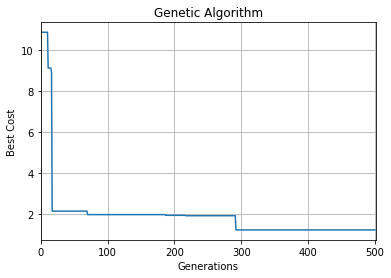

In [ ]:
# Problem definition
costfunc = sphere
num_var = 5       # number of decicion variables
varmin = -10      # lower bound
varmax = 10       # upper bound

# GA Parameters
maxit = 501                                              # number of iterations
npop = 20                                                # initial population size
beta = 1
prop_children = 1                                        # proportion of children to population
num_children = int(np.round(prop_children * npop/2)*2)   # making sure it always an even number
mu = 0.2                                                 # mutation rate 20%, 205 of 5 is 1, mutating 1 gene
sigma = 0.1                                              # step size of mutation


# Run GA
out = ga(costfunc, num_var, varmin, varmax, maxit, npop, num_children, mu, sigma, beta)

# Results
#(out, Bestsol, bestcost)
plt.plot(out[2])
plt.xlim(0, maxit)
plt.xlabel('Generations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show